In [1]:
from collections import defaultdict
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import classeval
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from imblearn.over_sampling import RandomOverSampler

# Data reading

In [2]:
df_f = pd.read_csv('feat.csv', na_values=[' ?'], error_bad_lines=False)
df_f.head()

,participantN,age,gender,trialN,task,condition,FeatConj,setSize,proportion,timelimit,...,group_same,group_switch,strict_line,blocked_grouped,ratio,run_length,cl_same,cl_other,cl_blue,cl_yellow
0,1,0,,1,0,r/g,0,80,50,0.0,...,0,0,0,0,-0.043466,0.0,46.307892,130.180474,95.377290,123.727589
1,1,0,,1,0,r/g,0,80,50,0.0,...,0,0,1,0,-0.066947,1.0,126.127896,67.599712,65.038921,146.307241
2,1,0,,1,0,r/g,0,80,50,0.0,...,0,0,0,0,0.066947,2.0,128.727980,92.588600,51.182460,197.918981
3,1,0,,1,0,r/g,0,80,50,0.0,...,0,0,0,0,0.045757,0.0,128.727980,50.406248,100.312921,96.387240
4,1,0,,1,0,r/g,0,80,50,0.0,...,0,0,1,0,-0.048305,1.0,236.606173,50.406248,115.722899,70.010926


In [3]:
df_c = pd.read_csv('conj.csv', na_values=[' ?'])
df_c.head()

,participantN,age,gender,trialN,task,condition,FeatConj,setSize,proportion,timelimit,...,grouping_same,grouping_switch,strict_line,blocked_grouped,ratio,run_length,cl_same,cl_other,cl_same_color,cl_same_shape
0,1,0,,0,0,rs/gd,1,80,50,0.0,...,0,0,0,0,-0.043466,0.0,72.458664,120.597315,173.653234,44.679822
1,1,0,,0,0,rs/gd,1,80,50,0.0,...,0,0,0,0,-0.066947,1.0,72.458664,182.400411,234.405408,83.775601
2,1,0,,0,0,rs/gd,1,80,50,0.0,...,0,0,0,0,-0.091770,2.0,73.795082,76.746862,82.512947,105.839343
3,1,0,,0,0,rs/gd,1,80,50,0.0,...,0,0,0,0,-0.118099,3.0,73.795082,103.951828,148.780161,58.197959
4,1,0,,0,0,rs/gd,1,80,50,0.0,...,0,0,0,0,-0.146128,4.0,73.427475,111.076559,194.010000,142.506925


In [4]:
df_f.describe()

,participantN,age,trialN,task,FeatConj,setSize,proportion,timelimit,timeTS,timeRel,...,group_same,group_switch,strict_line,blocked_grouped,ratio,run_length,cl_same,cl_other,cl_blue,cl_yellow
count,12870.000000,12870.000000,12870.000000,12870.0,12870.0,12870.0,12870.0,12870.0,12870.000000,12870.000000,...,12870.000000,12870.000000,12870.000000,12870.0,12870.000000,12870.000000,12870.000000,12870.000000,12870.000000,12870.000000
mean,56.424242,1.454545,5.027273,0.0,0.0,80.0,50.0,0.0,9677.775236,361.257980,...,1.326496,1.037451,0.044911,0.0,0.064201,2.691531,105.528243,98.016011,99.374017,98.937248
std,57.187211,5.774204,3.206536,0.0,0.0,0.0,0.0,0.0,8359.550436,408.490427,...,1.546946,1.306479,0.207116,0.0,0.363407,3.956121,44.740377,38.912214,40.410164,39.506846
min,1.000000,0.000000,0.000000,0.0,0.0,80.0,50.0,0.0,660.183458,99.307000,...,0.000000,0.000000,0.000000,0.0,-1.322219,0.000000,7.641217,4.293483,5.877933,9.577233
25%,9.000000,0.000000,2.000000,0.0,0.0,80.0,50.0,0.0,4709.145292,249.302979,...,0.000000,0.000000,0.000000,0.0,-0.091770,0.000000,73.970992,71.149950,71.827454,71.957130
50%,17.000000,0.000000,5.000000,0.0,0.0,80.0,50.0,0.0,8408.941917,316.416271,...,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,94.645416,89.083073,90.015061,89.791998
75%,125.000000,0.000000,8.000000,0.0,0.0,80.0,50.0,0.0,12309.683667,416.761729,...,3.000000,2.000000,0.000000,0.0,0.134699,3.000000,127.339915,115.658873,117.181983,115.636209
max,133.000000,27.000000,14.000000,0.0,0.0,80.0,50.0,0.0,82793.777083,40668.799167,...,7.000000,7.000000,1.000000,0.0,1.322219,19.000000,377.035174,336.753693,393.269275,374.578924


In [5]:
df_c.describe()

,participantN,age,trialN,task,FeatConj,setSize,proportion,timelimit,timeTS,timeRel,...,grouping_same,grouping_switch,strict_line,blocked_grouped,ratio,run_length,cl_same,cl_other,cl_same_color,cl_same_shape
count,12831.000000,12831.000000,12831.000000,12831.0,12831.0,12831.0,12831.0,12831.0,12831.000000,12831.000000,...,12831.000000,12831.000000,12831.000000,12831.0,12831.000000,12831.000000,12831.000000,12831.000000,12831.000000,12831.000000
mean,56.537994,1.458967,5.911854,0.0,1.0,80.0,50.0,0.0,11298.114532,466.628504,...,1.305978,1.015042,0.040917,0.0,0.179324,7.804458,105.513491,99.434963,99.223267,99.130805
std,57.236771,5.782416,3.580924,0.0,0.0,0.0,0.0,0.0,8331.539842,558.978566,...,1.538357,1.290897,0.198105,0.0,0.642546,5.721589,44.230939,40.501896,40.004760,39.473739
min,1.000000,0.000000,0.000000,0.0,1.0,80.0,50.0,0.0,640.156167,83.092667,...,0.000000,0.000000,0.000000,0.0,-1.322219,0.000000,32.318157,32.886681,32.340570,30.692352
25%,9.000000,0.000000,3.000000,0.0,1.0,80.0,50.0,0.0,5507.323917,265.987062,...,0.000000,0.000000,0.000000,0.0,-0.243038,3.000000,74.458502,71.652565,72.058006,72.259452
50%,17.000000,0.000000,6.000000,0.0,1.0,80.0,50.0,0.0,10177.088958,350.212583,...,0.000000,0.000000,0.000000,0.0,0.000000,7.000000,94.292463,90.074732,89.736319,90.146002
75%,125.000000,0.000000,9.000000,0.0,1.0,80.0,50.0,0.0,14874.375750,500.020083,...,3.000000,2.000000,0.000000,0.0,0.778151,13.000000,125.926552,116.545651,116.395681,115.647912
max,133.000000,27.000000,15.000000,0.0,1.0,80.0,50.0,0.0,79145.674583,20817.914875,...,7.000000,6.000000,1.000000,0.0,1.301030,19.000000,403.199657,457.292279,477.650534,411.250352


# Data preprocessing

#### Drop unuseful columns

In [6]:
df_f.columns = df_f.columns.str.strip()
for column in df_f.columns.values:
    if df_f[column].dtype == 'object':
        df_f[column] = df_f[column].str.strip()
df_f.columns.values

array(['participantN', 'age', 'gender', 'trialN', 'task', 'condition',
       'FeatConj', 'setSize', 'proportion', 'timelimit', 'stType',
       'imgName', 'timeTS', 'timeRel', 'runLength', 'runTest', 'touchTS',
       'runN', 'runNH', 'stPosX', 'stPosY', 'col', 'row', 'touchX',
       'touchY', 'touchDist', 'targDist', 'touchN', 'error', 'switches',
       'changeScreen', 'resp_pos', 'group_selected', 'group_same',
       'group_switch', 'strict_line', 'blocked_grouped', 'ratio',
       'run_length', 'cl_same', 'cl_other', 'cl_blue', 'cl_yellow'],
      dtype=object)

In [7]:
df_c.columns = df_c.columns.str.strip()
for column in df_c.columns.values:
    if df_c[column].dtype == 'object':
        df_c[column] = df_c[column].str.strip()
df_c.columns.values

array(['participantN', 'age', 'gender', 'trialN', 'task', 'condition',
       'FeatConj', 'setSize', 'proportion', 'timelimit', 'stType',
       'imgName', 'timeTS', 'timeRel', 'runLength', 'runTest', 'touchTS',
       'runN', 'runNH', 'stPosX', 'stPosY', 'col', 'row', 'touchX',
       'touchY', 'touchDist', 'targDist', 'touchN', 'error', 'switches',
       'changeScreen', 'resp_pos', 'grouping_selected', 'grouping_same',
       'grouping_switch', 'strict_line', 'blocked_grouped', 'ratio',
       'run_length', 'cl_same', 'cl_other', 'cl_same_color',
       'cl_same_shape'], dtype=object)

In [8]:
useless_features = ['participantN', 'age', 'gender', 'trialN', 'task', 'condition',
                    'FeatConj', 'setSize', 'proportion', 'timelimit', 'stType',
                    'imgName', 'timeTS', 'timeRel', 'runLength', 'runTest', 
                    'touchTS','runN', 'runNH', 'stPosX', 'stPosY', 'col', 
                    'row', 'touchX', 'touchY', 'touchDist', 'touchN', 'error',
                    'changeScreen', 'resp_pos']
df_f.drop(columns=useless_features, inplace=True)
df_f.columns.values

array(['targDist', 'switches', 'group_selected', 'group_same',
       'group_switch', 'strict_line', 'blocked_grouped', 'ratio',
       'run_length', 'cl_same', 'cl_other', 'cl_blue', 'cl_yellow'],
      dtype=object)

In [9]:
df_c.drop(columns=useless_features, inplace=True)
df_c.columns.values

array(['targDist', 'switches', 'grouping_selected', 'grouping_same',
       'grouping_switch', 'strict_line', 'blocked_grouped', 'ratio',
       'run_length', 'cl_same', 'cl_other', 'cl_same_color',
       'cl_same_shape'], dtype=object)

## Train_feat

In [10]:
X_f = df_f
y_f = df_f['switches'].to_numpy()

In [21]:
ycount=pd.DataFrame(y_f)
print(ycount[0].value_counts())

0    8735
1    4135
Name: 0, dtype: int64


In [12]:
train_f, test_f, y_train_f, y_test_f = train_test_split(X_f, y_f ,test_size=0.2,random_state=42)

In [13]:
# oclf = RandomForestClassifier(max_depth=2, random_state=0).fit(train_f, y_train_f)

In [14]:
# ros_f = RandomOverSampler(random_state=0)
# train_f, y_train_f = ros_f.fit_resample(train_feat, y_train_feat)
# print("Number of records for X_train is ", train_feat.shape)
# print("Number of records for X_resampled oversampling is ",train_f.shape)

In [15]:
weighted_clf = RandomForestClassifier(max_depth=2, random_state=0,class_weight={0:1,1:2}).fit(train_f, y_train_f)
print("F1 Score for RandomForestClassifier with class_weight parameter is ", f1_score(y_test_f,weighted_clf.predict(test_f)))
print("Accuracy  Score for RandomForestClassifier with class_weight parameter is ", accuracy_score(y_test_f,weighted_clf.predict(test_f)))

F1 Score for RandomForestClassifier with class_weight parameter is  1.0
Accuracy  Score for RandomForestClassifier with class_weight parameter is  1.0


## Train_conj

In [22]:
X_c = df_c
y_c = df_c['switches']

In [24]:
ycount1=pd.DataFrame(y_c)
print(ycount1.value_counts())

switches
0           11884
1             947
dtype: int64


In [26]:
train_c, test_c, y_train_c, y_test_c = train_test_split(X_c, y_c, test_size=0.2,random_state=42)

In [27]:
# oclf = RandomForestClassifier(max_depth=2, random_state=0).fit(train_c, y_train_c)

In [28]:
# ros = RandomOverSampler(random_state=0)
# train_c, y_train_c = ros.fit_resample(train_conj, y_train_conj)
# print("Number of records for X_train is ", train_conj.shape)
# print("Number of records for X_resampled oversampling is ",train_c.shape)

In [29]:
weighted_clf = RandomForestClassifier(max_depth=2, random_state=0,class_weight={0:1,1:18}).fit(train_c, y_train_c)
print("F1 Score for RandomForestClassifier with class_weight parameter is ", f1_score(y_test_c,weighted_clf.predict(test_c)))
print("Accuracy  Score for RandomForestClassifier with class_weight parameter is ", accuracy_score(y_test_c,weighted_clf.predict(test_c)))

F1 Score for RandomForestClassifier with class_weight parameter is  1.0
Accuracy  Score for RandomForestClassifier with class_weight parameter is  1.0


## Feature MultinomalNB

In [30]:
train_f.drop(columns='switches', inplace=True)
test_f.drop(columns='switches', inplace=True)

C:\Users\lttso\miniconda3\lib\site-packages\pandas\core\frame.py:4305: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


[classeval] AUC: 0.51
[classeval] F1: 0.05
[classeval] Kappa: 0.02
[classeval] MCC score: 0.04
[classeval] Average precision (AP): 0.32
[classeval] CAP: 806
Accuracy Score is  0.6826923076923077
Avg accuracy: 0.68269372658911
Accuracy state 1: 68.93549663632767
Accuracy state 0: 44.680851063829785


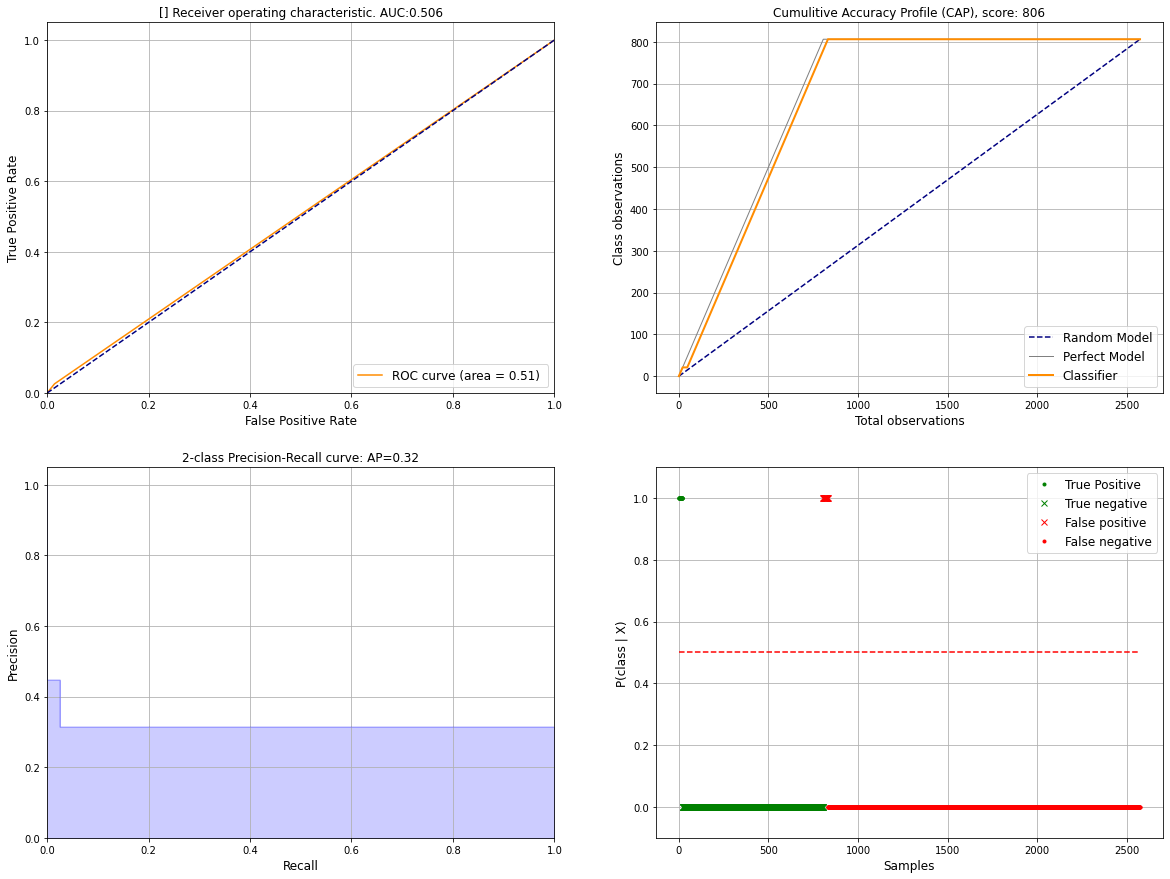

C:\Users\lttso\miniconda3\lib\site-packages\pandas\core\indexing.py:1636: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


array([[<AxesSubplot:title={'center':'[] Receiver operating characteristic. AUC:0.506'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
        <AxesSubplot:title={'center':'Cumulitive Accuracy Profile (CAP), score: 806'}, xlabel='Total observations', ylabel='Class observations'>],
       [<AxesSubplot:title={'center':'2-class Precision-Recall curve: AP=0.32'}, xlabel='Recall', ylabel='Precision'>,
        <AxesSubplot:xlabel='Samples', ylabel='P(class | X)'>]],
      dtype=object)

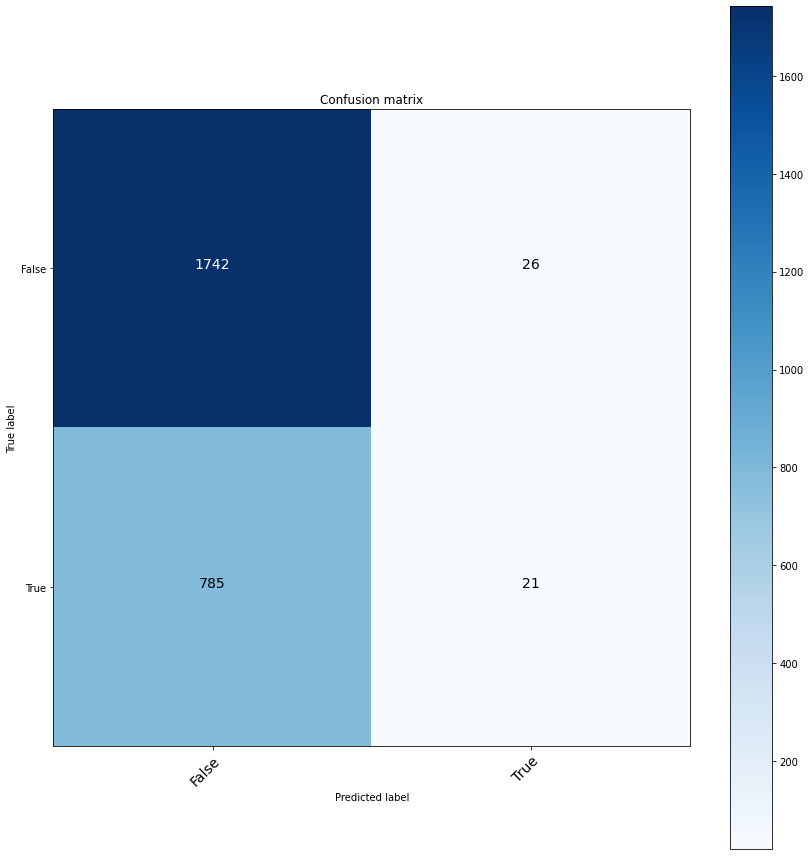

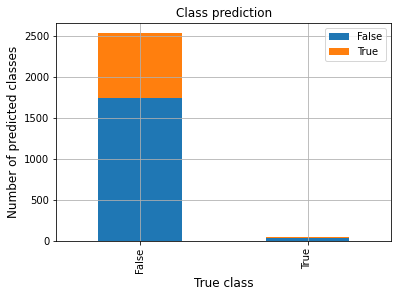

In [31]:
from sklearn.naive_bayes import BernoulliNB
model_f = BernoulliNB()
model_f.fit(train_f, y_train_f)

# Predict Output

k = 10
kf = KFold(n_splits=k, random_state=None)
# Evaluate results
result = cross_val_score(model_f , train_f, y_train_f, cv = kf)

y_pred_f = model_f.predict(test_f)
y_proba = model_f.predict_proba(test_f)
results = classeval.eval(y_test_f.astype(bool), y_pred_f.astype(bool), y_proba[:,0])
print("Accuracy Score is ", model_f.score(train_f, y_train_f))
print("Avg accuracy: {}".format(result.mean()))
conf_mat = metrics.confusion_matrix(y_test_f, y_pred_f)
print('Accuracy state 1:', conf_mat[0, 0] / (conf_mat[0, 0] + conf_mat[1,0])  * 100)
print('Accuracy state 0:', conf_mat[1, 1] / (conf_mat[1, 1] + conf_mat[0,1]) * 100)
classeval.plot(results)


## conjunctuin MultinomalNB

In [32]:
train_c.drop(columns='switches', inplace=True)
test_c.drop(columns='switches', inplace=True)

C:\Users\lttso\miniconda3\lib\site-packages\pandas\core\frame.py:4305: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


[classeval] AUC: 0.51
[classeval] F1: 0.05
[classeval] Kappa: 0.03
[classeval] MCC score: 0.04
[classeval] Average precision (AP): 0.08
[classeval] CAP: 201
Accuracy Score is  0.9273187840997662
Avg accuracy: 0.68269372658911
Accuracy state 1: 92.2955353615172
Accuracy state 0: 16.666666666666664


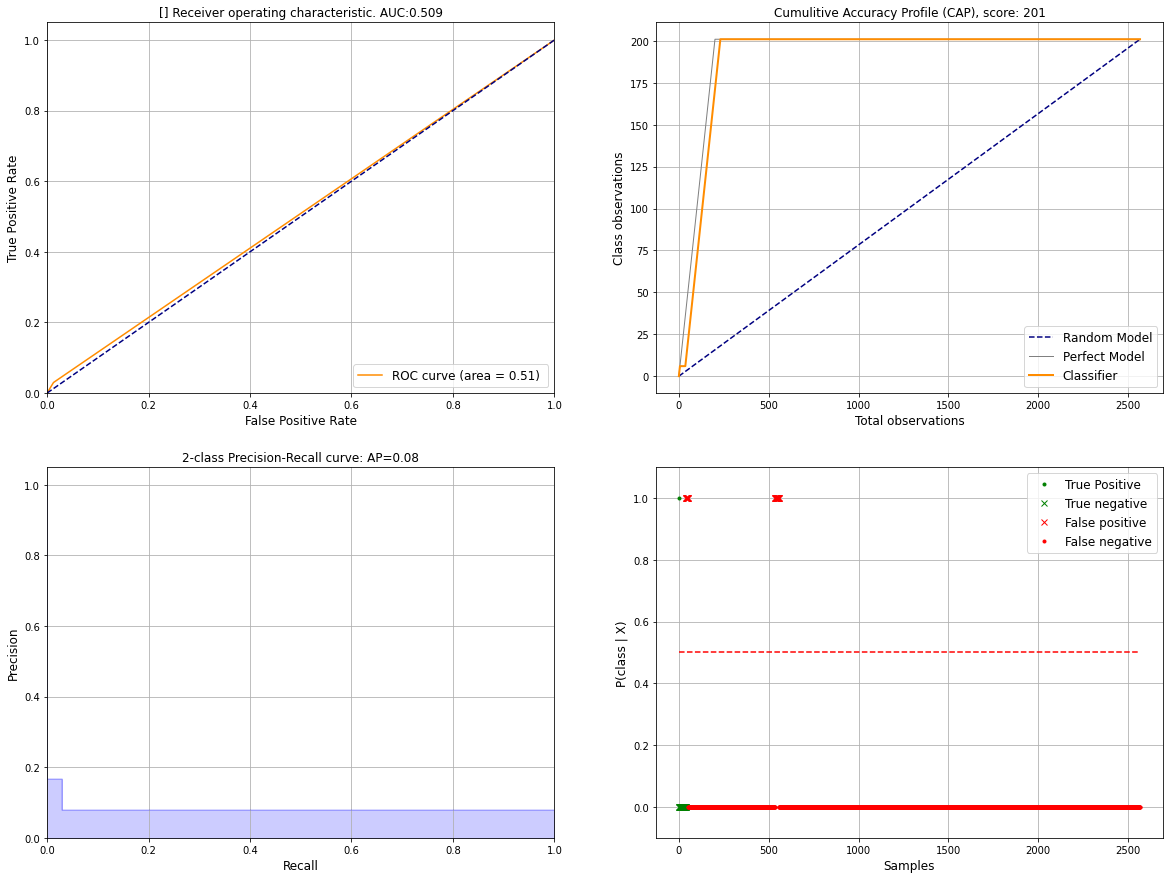

C:\Users\lttso\miniconda3\lib\site-packages\pandas\core\indexing.py:1636: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


array([[<AxesSubplot:title={'center':'[] Receiver operating characteristic. AUC:0.509'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
        <AxesSubplot:title={'center':'Cumulitive Accuracy Profile (CAP), score: 201'}, xlabel='Total observations', ylabel='Class observations'>],
       [<AxesSubplot:title={'center':'2-class Precision-Recall curve: AP=0.08'}, xlabel='Recall', ylabel='Precision'>,
        <AxesSubplot:xlabel='Samples', ylabel='P(class | X)'>]],
      dtype=object)

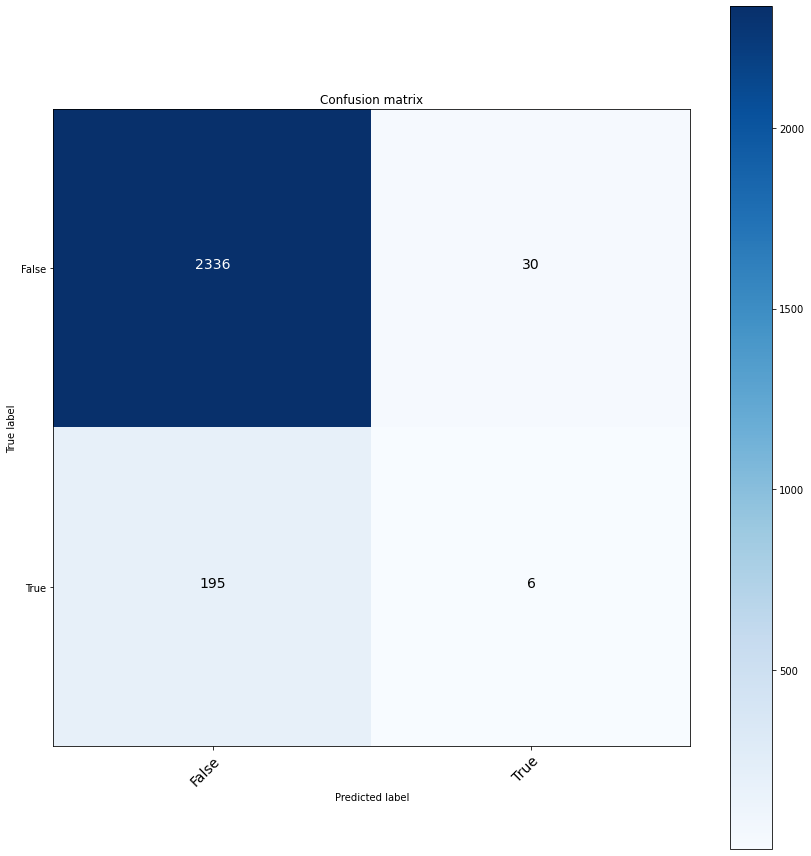

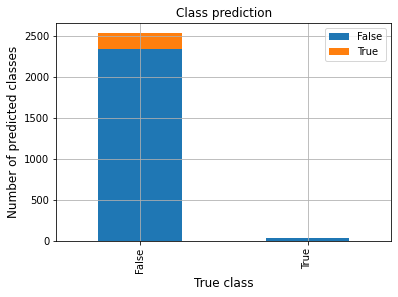

In [33]:
model_c = BernoulliNB()
model_c.fit(train_c, y_train_c)

# Predict Output
k = 10
kf = KFold(n_splits=k, random_state=None)
# Evaluate results
cross_val_score(model_c , train_c, y_train_c, cv = kf)
y_pred_c = model_f.predict(test_c)
y_proba = model_f.predict_proba(test_c)
results = classeval.eval(y_test_c.astype(bool), y_pred_c.astype(bool), y_proba[:,0])
print("Accuracy Score is ", model_c.score(train_c, y_train_c))
print("Avg accuracy: {}".format(result.mean()))
conf_mat = metrics.confusion_matrix(y_pred_c, y_test_c)
print('Accuracy state 1:', conf_mat[0, 0] / (conf_mat[0, 0] + conf_mat[0 ,1])  * 100)
print('Accuracy state 0:', conf_mat[1, 1] / (conf_mat[1, 0] + conf_mat[1, 1]) * 100)
conf_mat[0, 0] + conf_mat[0 ,1]
classeval.plot(results)

In [ ]:
from sklearn.naive_bayes import GaussianNB
model_c_g = GaussianNB()
model_c_g.fit(train_c, y_train_c)

# Predict Output
k = 10
kf = KFold(n_splits=k, random_state=None)
# Evaluate results
cross_val_score(model_c_g , train_c, y_train_c, cv = kf)

y_pred_c = model_f.predict(test_c)
y_proba = model_f.predict_proba(test_c)
results = classeval.eval(y_test_c.astype(bool), y_pred_c.astype(bool), y_proba[:,0])
print("Accuracy Score is ", model_c_g.score(train_c, y_train_c))
print("Avg accuracy: {}".format(result.mean()))
conf_mat = metrics.confusion_matrix(y_pred_c, y_test_c)
print('Accuracy state 1:', conf_mat[0, 0] / (conf_mat[0, 0] + conf_mat[0 ,1])  * 100)
print('Accuracy state 0:', conf_mat[1, 1] / (conf_mat[1, 0] + conf_mat[1, 1]) * 100)
conf_mat[0, 0] + conf_mat[0 ,1]
classeval.plot(results)